In [23]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

path = "training_data.csv"

data = pd.read_csv(path)
data = data.sample(frac=1)

"""categorical = ["Well Name", "Formation"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass"""

target = 'Facies'
features = [feature for feature in list(data.head(0)) if feature not in ("Well Name", "Formation", "Facies")]

X = data[features]

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)


y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

train_sizes = list(range(295,2065,295))




def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)
    
def gridsearch_helper(grid, estimator, X, y):
    gridsearch = model_selection.GridSearchCV(estimator = estimator, param_grid=grid)
    gridsearch.fit(X,y)
    return (gridsearch.best_estimator_, gridsearch.best_score_, gridsearch.best_params_)

def randomizedsearch_helper(grid, estimator, X, y):
    gridsearch = model_selection.RandomizedSearchCV(estimator = estimator, param_distributions=grid)
    gridsearch.fit(X,y)
    return (gridsearch.best_estimator_, gridsearch.best_score_, gridsearch.best_params_)

"""def plot_complexity_curve(hyperparameter_values, time_complexity, train_scores_mean, validation_scores_mean, labels=()):

    fig, ax1 = plt.subplots()
    ax1.set_ylim([0,1.1])
    ax2 = ax1.twinx()
    ax1.plot(hyperparameter_values, train_scores_mean)
    ax1.plot(hyperparameter_values, validation_scores_mean)
    ax2.plot(hyperparameter_values, time_complexity)
    ax1.set_ylabel('', fontsize = 14)
    ax1.set_xlabel('', fontsize = 14)
    ax1.set_title('', fontsize = 18, y = 1.03)
    ax2.set_ylabel('', fontsize = 14)"""

def plot_complexity_curve(hyperparameter_values, time_complexity, smoothed_tc, 
                          train_scores_mean, validation_scores_mean, labels=('Accuracy', 
                            'Tree Depth', 'Model Complexity vs Accuracy and Time Complexity', 'Time Complexity')):
    """
    https://matplotlib.org/examples/api/two_scales.html
    """
    fig, ax1 = plt.subplots()
    ax1.set_ylim([0,1.1])
    ax2 = ax1.twinx()
    ax1.plot(hyperparameter_values, train_scores_mean)
    ax1.plot(hyperparameter_values, validation_scores_mean)
    ax2.plot(hyperparameter_values, smoothed_tc, c='black', label='Time Complexity Curve')
    ax2.scatter(hyperparameter_values, time_complexity, c='red', label='Time Complexity')
    
    ax1.set_ylabel(labels[0], fontsize = 14)
    ax1.set_xlabel(labels[1], fontsize = 14)
    ax1.set_title(labels[2], fontsize = 18, y = 1.03)
    ax2.set_ylabel(labels[3], fontsize = 14)
    ax2.set_ylim(ymin=0)
    plt.legend()

def model_helper(grid, classifier, X, y, randomsearch = True):
    if randomsearch:
        est, acc, param = randomizedsearch_helper(grid, classifier, X, y)
    else:
        est, acc, param = gridsearch_helper(grid, classifier, X, y)
    est.fit(X_train,y_train)
    print(acc)
    print(est)
    return (est, acc, param)

def test_helper(grid, classifier, X, y, randomsearch = True):
    if randomsearch:
        est, acc, param = randomizedsearch_helper(grid, classifier, X, y)
    else:
        est, acc, param = gridsearch_helper(grid, classifier, X, y)
    est.fit(X_train,y_train)
    print(est)
    y_pred = est.predict(X_test)   
    print(classification_report(y_test,y_pred))
    print(est.score(X_test, y_test))
    print(sklearn.metrics.confusion_matrix(y_test, y_pred))
    return (est, acc, param)


# ExtraTrees Classifier
ExtraTree stands for EXtremely RAndomized Trees. This algorithm is distinct from other 
In some cases, it can 

From the original paper,

https://orbi.uliege.be/bitstream/2268/9357/1/geurts-mlj-advance.pdf

Randomization increases bias and variance of individual trees (extremely undesirable), but may decrease their variance with respect to the learning sample

It is most sensitive to max_depth, relatively non-sensitive to n_estimators (surprisingly)

Does the performance of trees indicate anything about the performance we should expect here?

0.7098646034816247
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=11, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


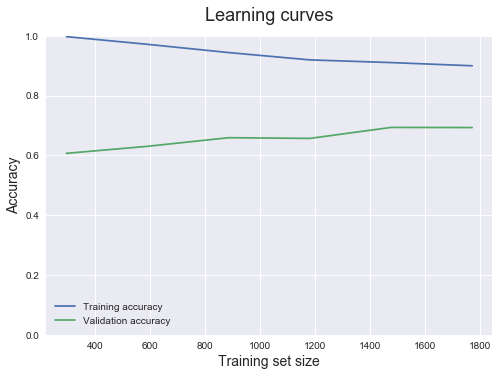

In [20]:
"""
This is the ExtraTreesClassifier

"""

etc_grid = {'n_estimators' : range(5,20,5), 'max_depth' : range(3,13),
            'max_features':["auto","log2",None], 'warm_start':[True, False]}
result = model_helper(etc_grid, ExtraTreesClassifier(random_state=1), X_train, y_train)
etc_est = result[0]

plot_learning_curve(*tv_scores_mean(etc_est,X_train,y_train,train_sizes))

In [37]:
from scipy.signal import savgol_filter

gridsearch = model_selection.GridSearchCV(estimator = etc_est, param_grid = {'max_depth' : range(3,50,1)}, pre_dispatch=1)
gridsearch.fit(X_train,y_train)
total_time = gridsearch.cv_results_['mean_score_time'] + gridsearch.cv_results_['mean_fit_time']

smooth_tt = savgol_filter(total_time, 19, 3)

plot_complexity_curve(gridsearch.param_grid['max_depth'], total_time, smooth_tt, gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])

ValueError: Invalid parameter max_depth for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.

# Decision Tree Classifier

0.639458413926499
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='random')


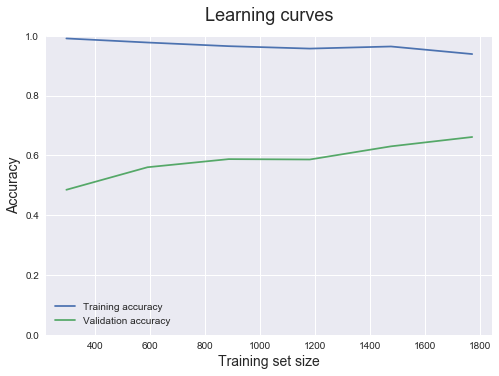

In [26]:
"""
This is the DecisionTreesClassifier

"""


tree_grid = {'max_depth' : range(3,15), 'splitter':["best","random"], 'max_features':["auto","log2",None]}
result = model_helper(tree_grid, DecisionTreeClassifier(random_state=1), X_train, y_train)
dtc_est = result[0]

plot_learning_curve(*tv_scores_mean(dtc_est,X_train,y_train,train_sizes))

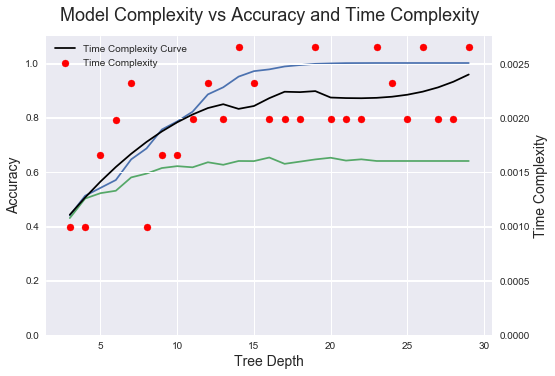

In [28]:
gridsearch = model_selection.GridSearchCV(estimator = dtc_est, param_grid = {'max_depth' : range(3,30)})
gridsearch.fit(X_train,y_train)
total_time = gridsearch.cv_results_['mean_score_time'] + gridsearch.cv_results_['mean_fit_time']
smooth_tt = savgol_filter(total_time, 19, 3)

plot_complexity_curve(gridsearch.param_grid['max_depth'], total_time, smooth_tt, gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])

# k Nearest Neighbors


0.7148936170212766
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')


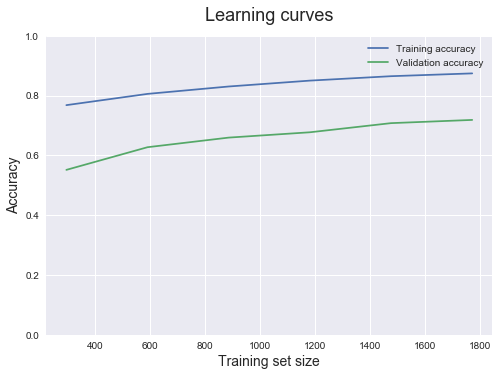

In [29]:
"""
This is kNearestNeighbors

"""

knn_grid = {'n_neighbors' : range(3,20), 'p':[1], 'weights':["uniform"]}
result = model_helper(knn_grid, KNeighborsClassifier(), X_train, y_train, randomsearch=False)
knn_est = result[0]
plot_learning_curve(*tv_scores_mean(knn_est,X_train,y_train,train_sizes))


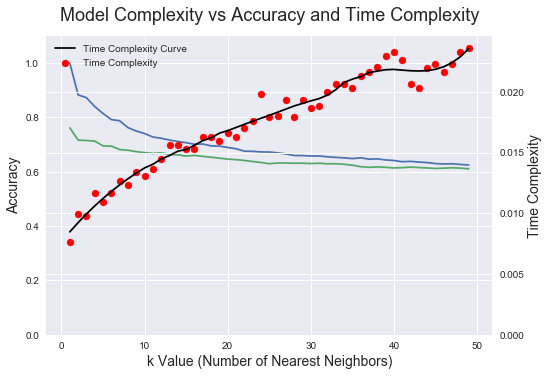

In [38]:
gridsearch = model_selection.GridSearchCV(estimator = knn_est, param_grid = {'n_neighbors' : range(1,50,1)})
gridsearch.fit(X_train,y_train)
total_time = gridsearch.cv_results_['mean_score_time'] + gridsearch.cv_results_['mean_fit_time']
smooth_tt = savgol_filter(total_time, 19, 3)
labels = ('Accuracy', 'k Value (Number of Nearest Neighbors)', 'Model Complexity vs Accuracy and Time Complexity', 'Time Complexity')
plot_complexity_curve(gridsearch.param_grid['n_neighbors'], total_time, smooth_tt, gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'], labels)

# Random Forest

0.7059961315280464
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=True)


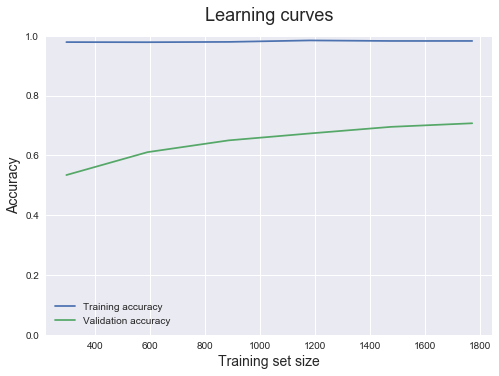

In [8]:
rfc_grid = {'n_estimators' : range(2,10), 'max_features':["auto","log2",None], 'warm_start':[True, False]}
result = model_helper(rfc_grid, RandomForestClassifier(random_state=1), X_train, y_train)
knn_est = result[0]
plot_learning_curve(*tv_scores_mean(knn_est,X_train,y_train,train_sizes))


# Multilayer Perceptron

0.681624758220503
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=90, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


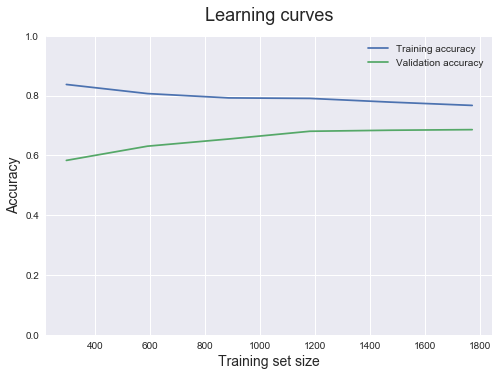

In [46]:
nn_grid = {'hidden_layer_sizes': [n for n in range(10,100,10)], 
           'alpha':[0.001, 0.01, 0.1]}
result = model_helper(nn_grid, MLPClassifier(random_state=1, max_iter=500), X_train, y_train)
nn_est = result[0]
plot_learning_curve(*tv_scores_mean(nn_est,X_train,y_train,train_sizes))


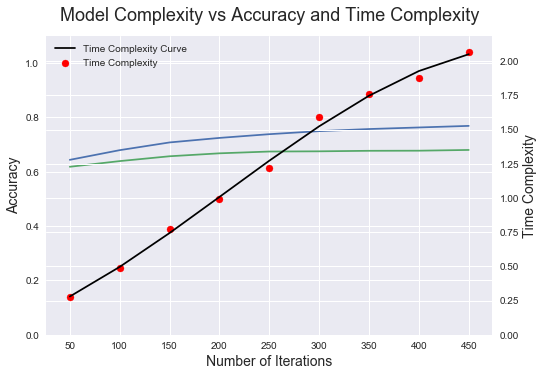

In [47]:
gridsearch = model_selection.GridSearchCV(estimator = nn_est, param_grid = {'max_iter' : range(50,500,50)})
gridsearch.fit(X_train,y_train)
total_time = gridsearch.cv_results_['mean_score_time'] + gridsearch.cv_results_['mean_fit_time']
smooth_tt = savgol_filter(total_time, 9, 3)
labels = ('Accuracy', 'Number of Iterations', 'Model Complexity vs Accuracy and Time Complexity', 'Time Complexity')
plot_complexity_curve(gridsearch.param_grid['max_iter'], total_time, smooth_tt, gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'],labels)

# Support Vector Machine

0.6081237911025145
SVC(C=13, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)


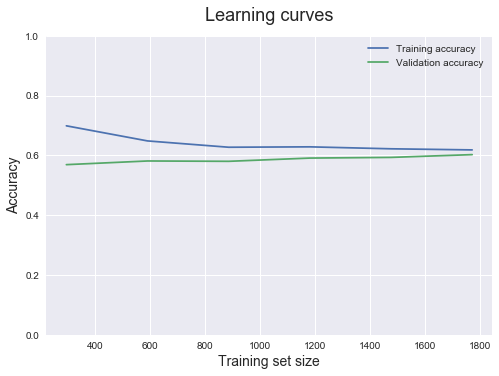

In [48]:
from sklearn.svm import LinearSVC

svc_grid = {'C': range(1,20,2)}
result = model_helper(svc_grid, SVC(random_state=1, kernel='linear'), X_train, y_train)
svc_est = result[0]
plot_learning_curve(*tv_scores_mean(svc_est,X_train,y_train,train_sizes))


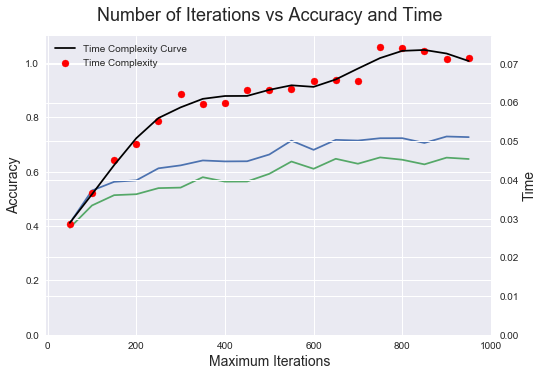

In [58]:
from sklearn import svm, model_selection

labels = ('Accuracy', 'Maximum Iterations', 'Number of Iterations vs Accuracy and Time', 'Time')
gridsearch = model_selection.GridSearchCV(estimator = svc_est, param_grid = {'max_iter' :  [50*n for n in range(1,20)]})
gridsearch.fit(X_train,y_train)
total_time = gridsearch.cv_results_['mean_score_time'] + gridsearch.cv_results_['mean_fit_time']
smooth_tt = savgol_filter(total_time, 7, 3)
plot_complexity_curve(gridsearch.param_grid['max_iter'], total_time, smooth_tt, gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'], labels)


# Support Vector Machine (Nonlinear Kernel)

0.6437137330754352
SVC(C=19, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)


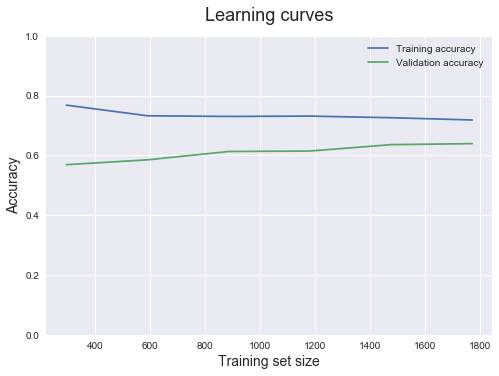

In [51]:
from sklearn.svm import LinearSVC

svc_grid = {'C': range(1,20,2)}
result = model_helper(svc_grid, SVC(random_state=1, kernel='poly'), X_train, y_train)
svc_est = result[0]
plot_learning_curve(*tv_scores_mean(svc_est,X_train,y_train,train_sizes))


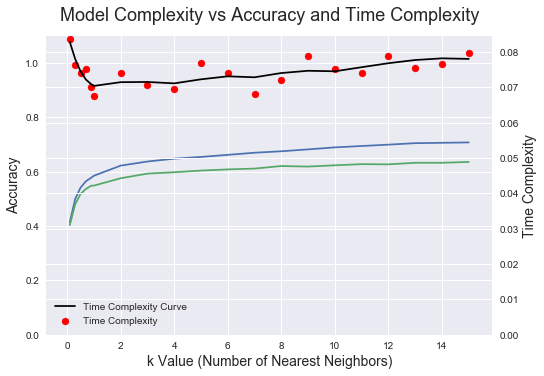

In [52]:
from sklearn import svm, model_selection

labels = ('Accuracy', 'k Value (Number of Nearest Neighbors)', 'Model Complexity vs Accuracy and Time Complexity', 'Time Complexity')
gridsearch = model_selection.GridSearchCV(estimator = svc_est, param_grid = {'C' :  [0.1*n for n in range(1,10,2)] + [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]})
gridsearch.fit(X_train,y_train)
total_time = gridsearch.cv_results_['mean_score_time'] + gridsearch.cv_results_['mean_fit_time']
smooth_tt = savgol_filter(total_time, 11, 3)
plot_complexity_curve(gridsearch.param_grid['C'], total_time, smooth_tt, gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'], labels)

# Best Results

In [13]:


best_class = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=True)

best_class.fit(X_train,y_train)
y_pred = best_class.predict(X_test)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.85      0.83      0.84        41
          2       0.80      0.85      0.82       145
          3       0.83      0.80      0.81       124
          4       0.85      0.79      0.81        42
          5       0.78      0.67      0.72        46
          6       0.72      0.75      0.73        96
          7       0.94      0.76      0.84        21
          8       0.71      0.78      0.75        92
          9       0.92      0.85      0.88        40

avg / total       0.80      0.79      0.79       647



In [14]:
best_class_2 = sklearn.neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='distance')
best_class_2.fit(X_train,y_train)
y_pred = best_class_2.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.85      0.95      0.90        41
          2       0.87      0.84      0.85       145
          3       0.84      0.85      0.85       124
          4       0.76      0.74      0.75        42
          5       0.74      0.67      0.70        46
          6       0.73      0.71      0.72        96
          7       0.81      0.62      0.70        21
          8       0.70      0.78      0.74        92
          9       0.90      0.88      0.89        40

avg / total       0.80      0.80      0.80       647

